In [2]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv("E:\Python\codes\loan-prediction.csv")


In [3]:
df.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.boxplot(column='LoanAmount', by='ApplicantIncome')


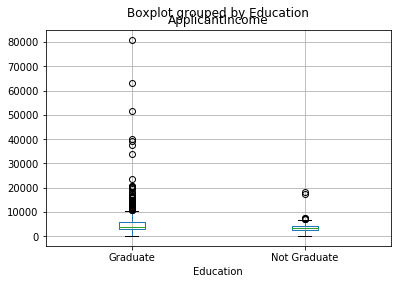

In [5]:
df.boxplot(column='ApplicantIncome', by = 'Education')

AttributeError: Unknown property bin

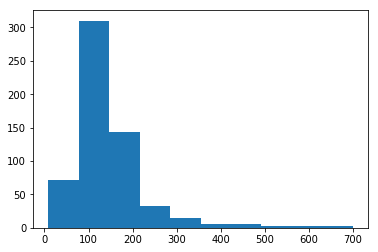

In [6]:
df['LoanAmount'].hist(bin=10)

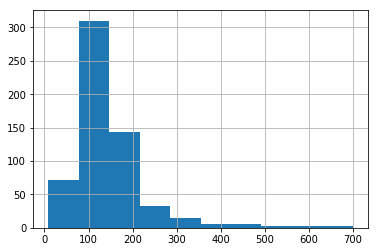

In [7]:
df['LoanAmount'].hist(bins=10)


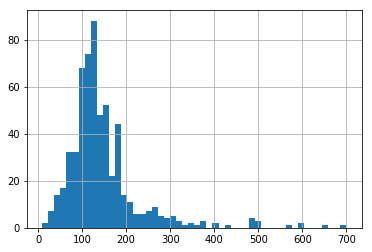

In [8]:
df['LoanAmount'].hist(bins=50)

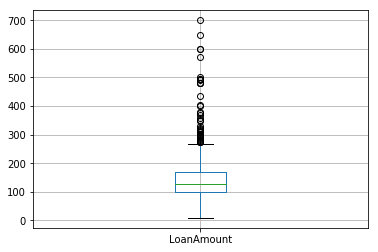

In [9]:
df.boxplot(column='LoanAmount')

In [10]:
df.describe('LoanAmount')


TypeError: '<=' not supported between instances of 'int' and 'numpy.str_'

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.apply(lambda x: sum(x.isnull(),axis=0))


TypeError: ('sum() takes no keyword arguments', 'occurred at index Loan_ID')

In [13]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace= True)


In [15]:
df.apply(lambda x:sum(x.isnull()),axis=0)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print(temp1)
print(temp2)

SyntaxError: invalid syntax (<ipython-input-16-7d9162635de6>, line 2)

In [17]:
temp1=df['Credit_History'].value_counts(ascending=True)
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print(temp1)
print(temp2)

0.0     89
1.0    475
Name: Credit_History, dtype: int64
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


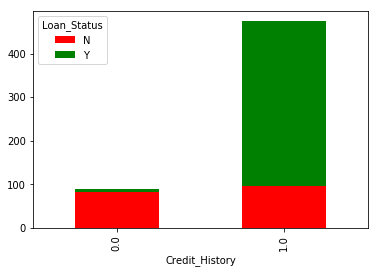

In [18]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked='True',color=['red','green'],grid=False)

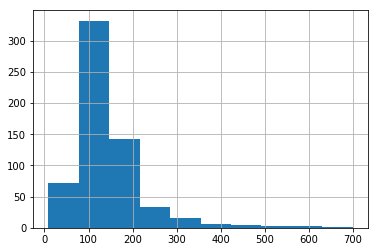

In [19]:
df['LoanAmount'].hist(bins=10)


In [20]:
df['LoansAmount']=np.log(df['LoansAmount'])


NameError: name 'np' is not defined

In [21]:
import numpy as np
df['LoansAmount']=np.log(df['LoansAmount'])

KeyError: 'LoansAmount'

In [22]:
import numpy as np
df['LoanAmount']=np.log(df['LoanAmount'])

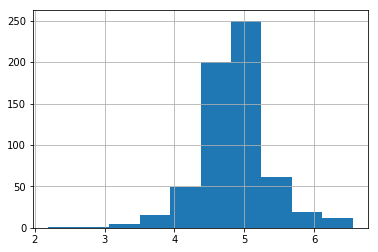

In [23]:
df['LoanAmount'].hist(bins=10)

In [24]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [25]:
 from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

TypeError: argument must be a string or number

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [1]:
df.boxplot(column='Credit_History', by = 'LoanAmount')

NameError: name 'df' is not defined

In [2]:
df=pd.read_csv("E:\Python\codes\loan-prediction.csv")
df.boxplot(column='Credit_History', by = 'LoanAmount')

NameError: name 'pd' is not defined

In [3]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv("E:\Python\codes\loan-prediction.csv")
df.boxplot(column='Credit_History', by = 'LoanAmount')

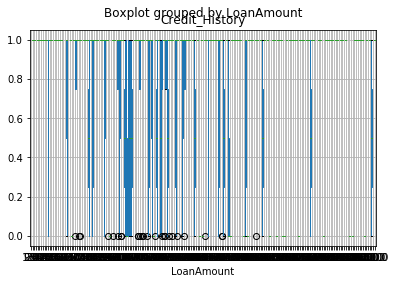

In [4]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv("E:\Python\codes\loan-prediction.csv")
df.boxplot(column='Credit_History', by = 'LoanAmount')

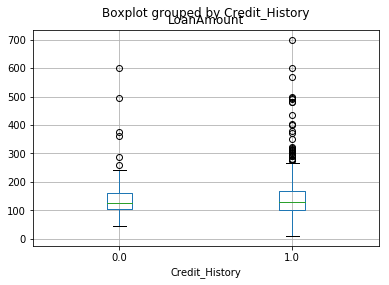

In [5]:
df.boxplot(column='LoanAmount', by = 'Credit_History')